In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Prepare the data

In [6]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building the network

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

Validating our approach

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s - loss: 0.5160 - binary_accuracy: 0.7893 - val_loss: 0.4012 - val_binary_accuracy: 0.8647
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - binary_accuracy: 0.9030 - val_loss: 0.3246 - val_binary_accuracy: 0.8782
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - binary_accuracy: 0.9243 - val_loss: 0.2809 - val_binary_accuracy: 0.8927
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - binary_accuracy: 0.9425 - val_loss: 0.2730 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1502 - binary_accuracy: 0.9519 - val_loss: 0.2777 - val_binary_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1217 - binary_accuracy: 0.9629 - val_loss: 0.3177 - val_binary_accuracy: 0.8806
Epoch 7/20
15000/15000 [====================

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'binary_accuracy', 'loss'])

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

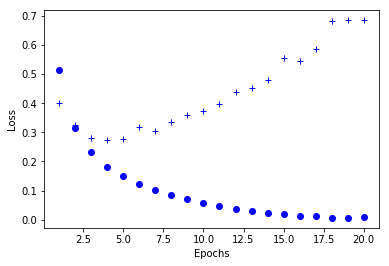

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

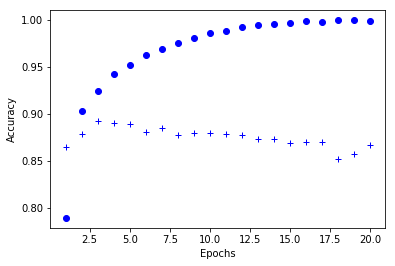

In [19]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Re-training a model from scratch

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4719 - acc: 0.8106     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2653 - acc: 0.9079     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2023 - acc: 0.9276     
Epoch 4/4
24960/25000 [============================>.] - ETA: 0s

In [21]:
results

[0.29143026048660281, 0.88507999999999998]

In [22]:
model.predict(x_test)

array([[ 0.92330354],
       [ 0.82898992],
       [ 0.99945647],
       ..., 
       [ 0.44327146],
       [ 0.00346331],
       [ 0.81254214]], dtype=float32)